# Problem 12 
## "Wine Classification"

Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

Training dataset is availible at https://archive.ics.uci.edu/ml/datasets/wine

# Imports

In [131]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

import seaborn as sns

# Data loading

In [48]:
data = pd.read_csv("Wine_Data.csv")
data.info()
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
55,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150


# Data understanding

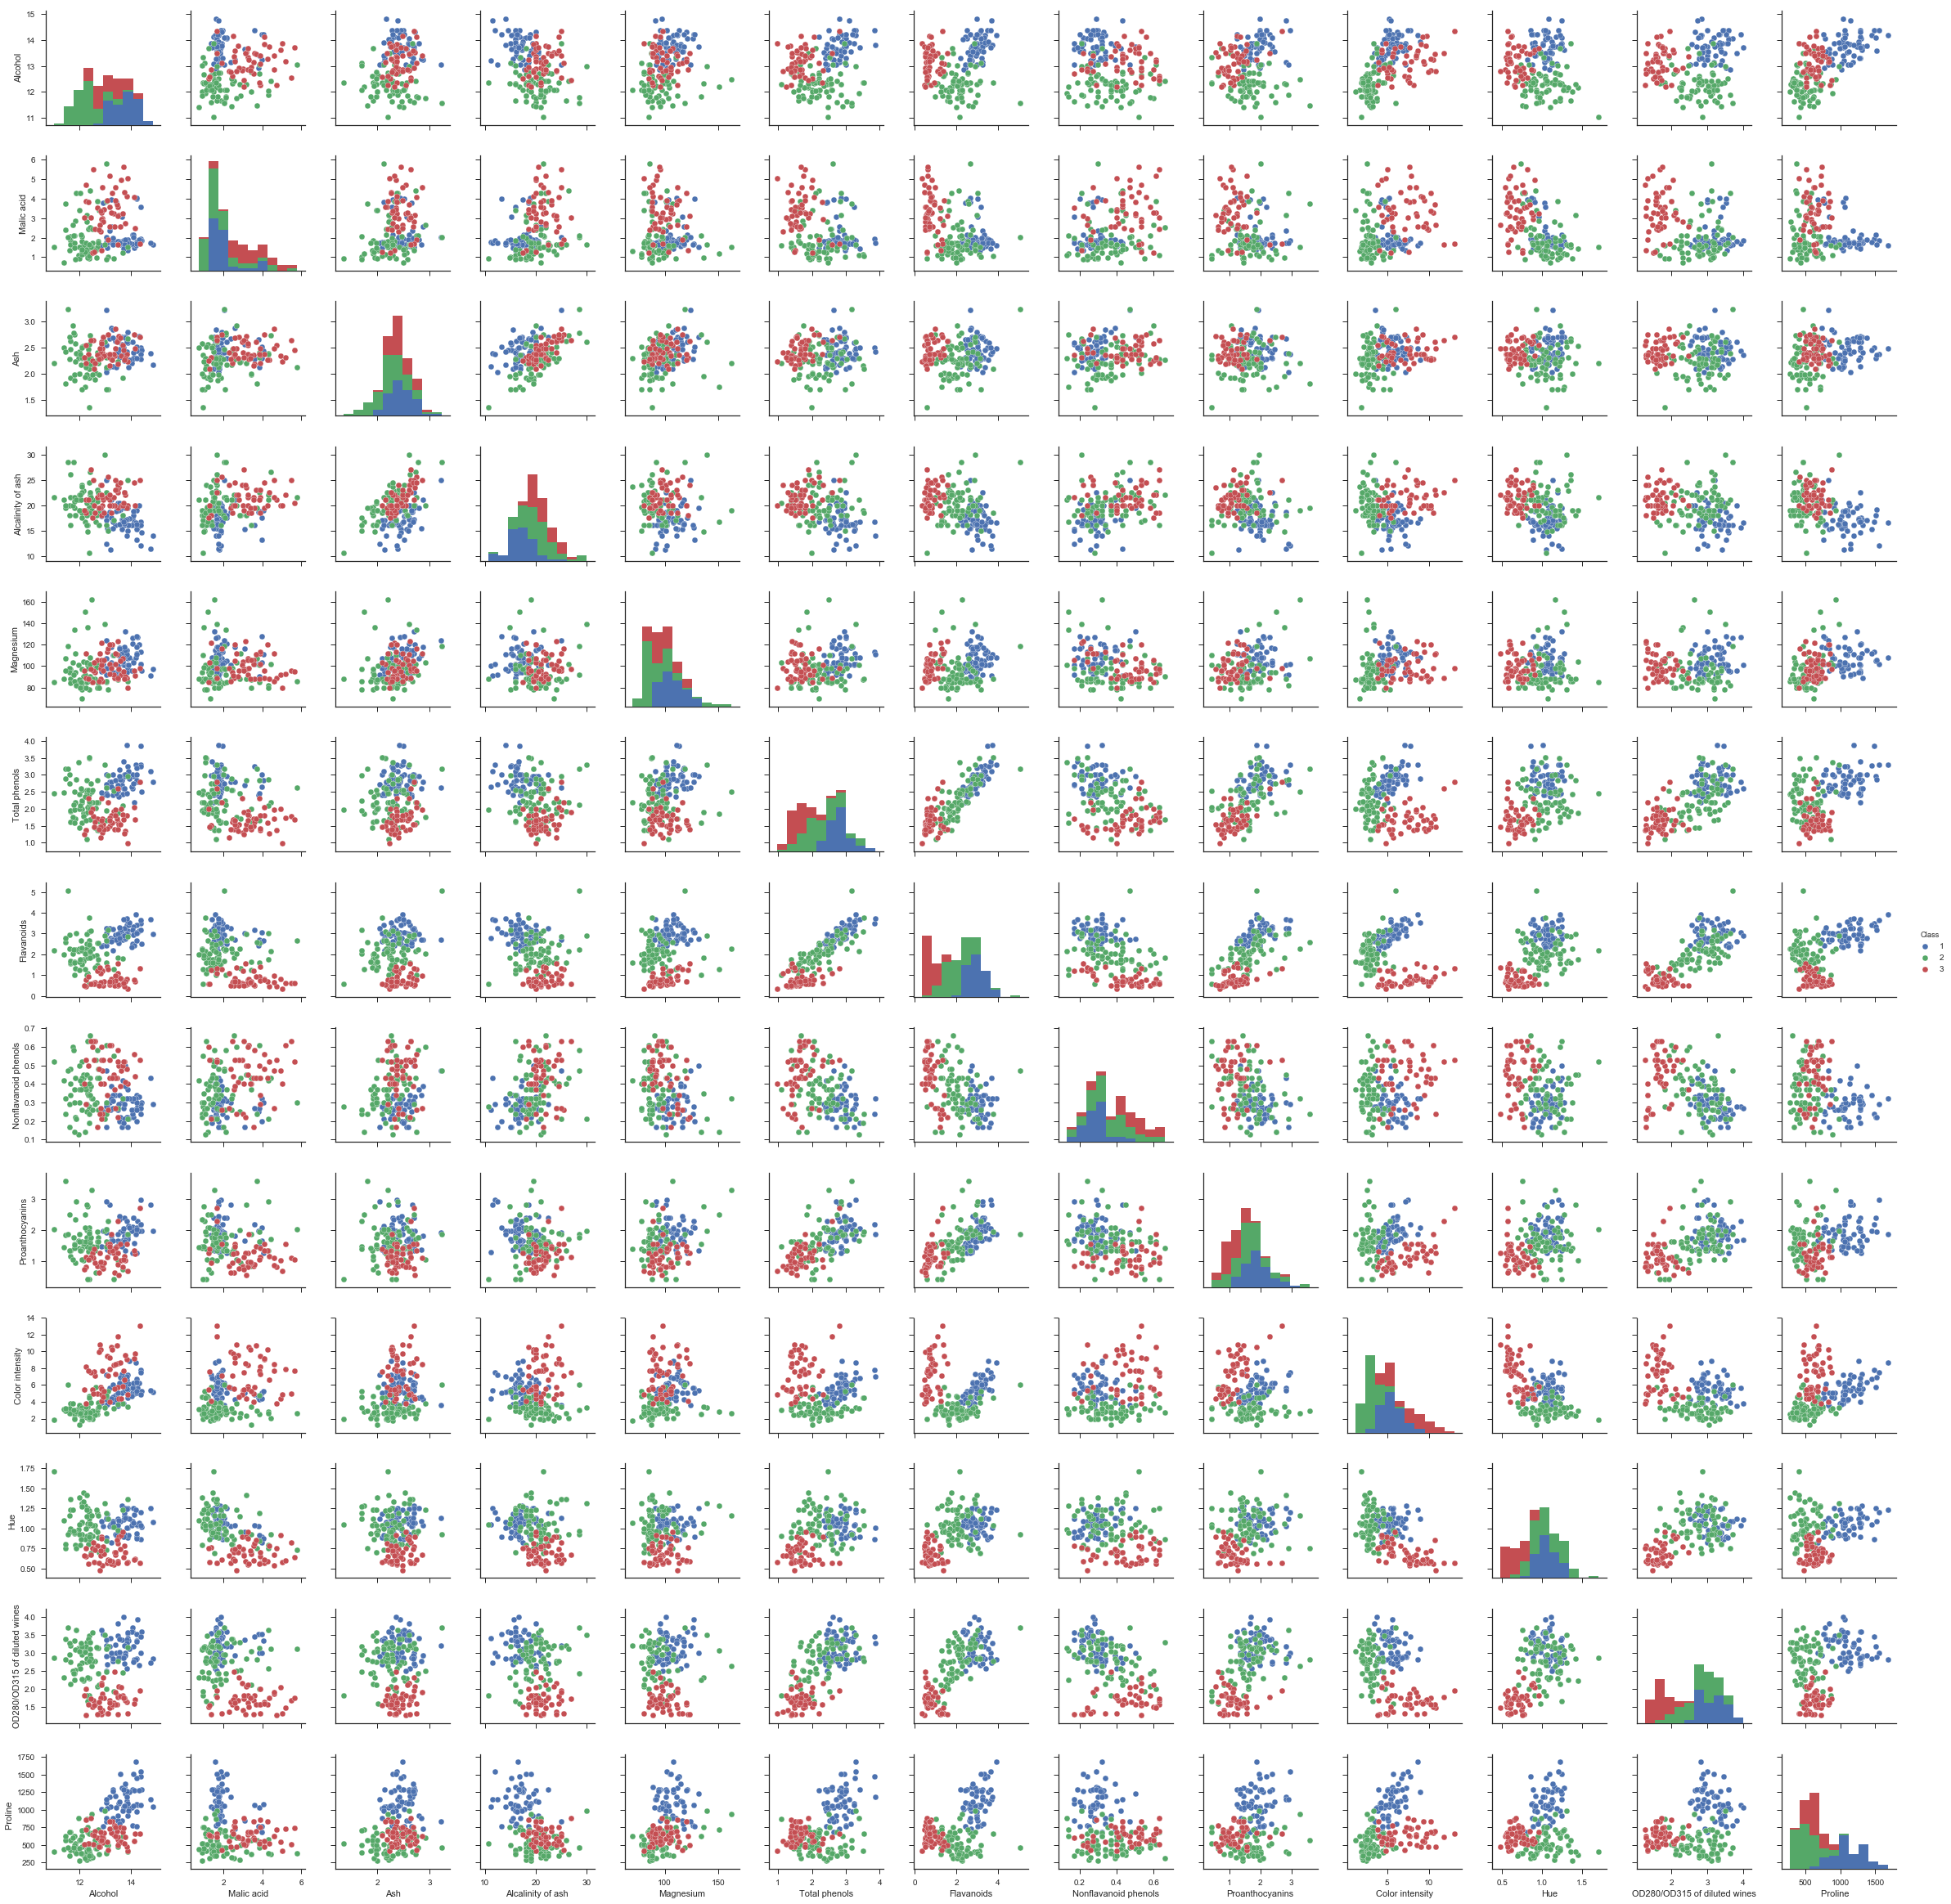

In [123]:
columns = [i for i in data.columns]
sns.set(style="ticks")
sns.pairplot(data, hue='Class', vars=columns[1:])

# Train-test splin and normalization

In [103]:
#trai-test split preserving class distribution ratio
X = data.iloc[:, 1:]
y = data.iloc[:, :1]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=data['Class'], test_size=0.2, random_state=11)

#normalize features by shrinking to [0,1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search for optimal parameters of kNN

In [50]:
cv = StratifiedKFold(n_splits=5, shuffle=False)
model = KNeighborsClassifier(n_neighbors=5)
parameters = {
    'n_neighbors' : range(1,31),
    'p' : range(1,4)
}
clf = GridSearchCV(model, parameters, return_train_score=True, n_jobs=-1, scoring='accuracy', cv=cv)
clf.fit(X_train, y_train)

print(clf.best_estimator_, clf.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform') 0.9788732394366197


C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


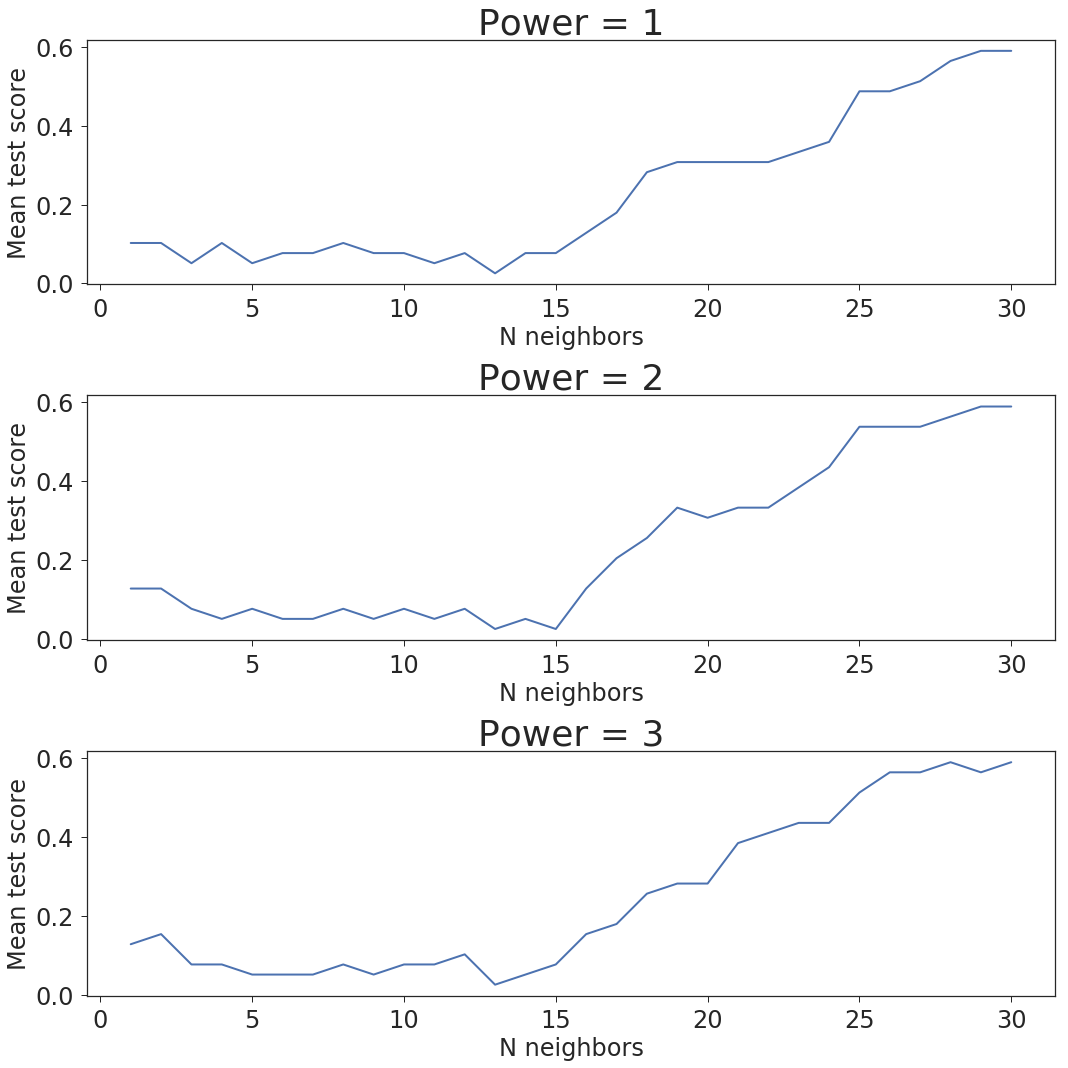

In [132]:
scores = clf.cv_results_['mean_test_score']
n_neigh = clf.cv_results_['param_n_neighbors']

plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(n_neigh[0::3], 1-scores[0::3])
plt.title('Power = 1')
plt.xlabel('N neighbors')
plt.ylabel('Mean test score')

plt.subplot(3, 1, 2)
plt.plot(n_neigh[1::3], 1-scores[1::3])
plt.title('Power = 2')
plt.xlabel('N neighbors')
plt.ylabel('Mean test score')

plt.subplot(3, 1, 3)
plt.plot(n_neigh[2::3], 1-scores[2::3])
plt.title('Power = 3')
plt.xlabel('N neighbors')
plt.ylabel('Mean test score')

plt.tight_layout()
plt.show()

#scores = clf.cv_results_['mean_test_score']
#n_neigh = clf.cv_results_['param_n_neighbors']
#p = clf.cv_results_['param_p']
#sc = plt.scatter(n_neigh, scores, c=p)
#plt.colorbar(sc)
#plt.show()

In [110]:
best_model = clf.best_estimator_
score = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
score.mean(), score.std()

C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

(0.975, 0.049999999999999996)

In [116]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


# Model comparison conclusion

In [117]:
print('The best model found is', best_model)
print('Score on test is', test_score)

The best model found is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=1,
           weights='uniform')
Score on test is 0.9568345323741008


# Error estimation

In [119]:
error = []
train_size = []
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=data['Class'], test_size=0.2, random_state=11)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.ravel(y_train)
for i in range(X_train.shape[0],39, -1):
    clf.fit(X_train, y_train)
    y_pred = clf.best_estimator_.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    error.append(1 - score)
    train_size.append(i)
    X_train = X_train[1:, :]
    y_train = y_train[1:]
    if i % 10 == 0:
        print(i)

140
130
120
110
100
90
80
70
60
50
40


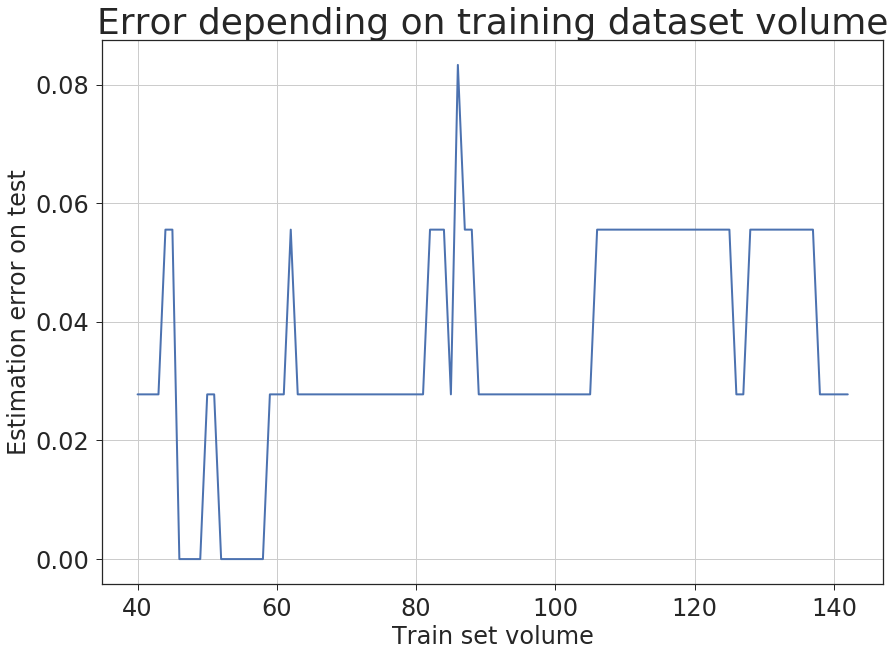

In [138]:
plt.figure(figsize=(14,10))
plt.grid(True)

plt.plot(train_size, error)
plt.title('Error depending on training set size')
plt.xlabel('Train set volume', size=24)
plt.ylabel('Estimation error on test', size=24)
plt.savefig(fname='fixed_test.png',format='png')
plt.show()

In [121]:
ratio = []
err = []
for i in range(2, 81, 2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=data['Class'], test_size=i/100, random_state=11)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = np.ravel(y_train)
    clf.fit(X_train, y_train)
    y_pred = clf.best_estimator_.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)
    err.append(1 - score)
    ratio.append(i)

1.0
1.0
1.0
0.9333333333333333
0.9444444444444444
0.9545454545454546
0.96
0.9655172413793104
0.9696969696969697
0.9722222222222222
0.95
0.9767441860465116
0.9787234042553191
0.96
0.9814814814814815
0.9649122807017544
0.9672131147540983
0.9692307692307692
0.9852941176470589
0.9722222222222222
0.96
0.9746835443037974
0.9878048780487805
0.9767441860465116
0.9775280898876404
0.956989247311828
0.979381443298969
0.95
0.9423076923076923
0.9719626168224299
0.954954954954955
0.9649122807017544
0.9661016949152542
0.9098360655737705
0.952
0.9457364341085271
0.9393939393939394
0.9411764705882353
0.9568345323741008


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Roman\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Roman\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002A340C0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Roman\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\R...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002A340C0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Roman\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\R...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\Roman\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\Roman\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(592, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\Roman\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(592, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (592, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=592, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 24, 0, 5, 56, 592882, tzinfo=tzutc()), 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'session': 'c203458742444baf9af36788286428df', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'c203458742444baf9af36788286428df']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 24, 0, 5, 56, 592882, tzinfo=tzutc()), 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'session': 'c203458742444baf9af36788286428df', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'c203458742444baf9af36788286428df'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 24, 0, 5, 56, 592882, tzinfo=tzutc()), 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'session': 'c203458742444baf9af36788286428df', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '87c977ae6c754a9cb87c6b3b34d824bc', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='ratio = []\nerr = []\nfor i in range(2, 81, 2):\n  ...re)\n    err.append(1 - score)\n    ratio.append(i)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-121-4eb870bc29bf>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at b0c2860, execution_co...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000000005502B70, file "<ipython-input-121-4eb870bc29bf>", line 3>
        result = <ExecutionResult object at b0c2860, execution_co...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000000005502B70, file "<ipython-input-121-4eb870bc29bf>", line 3>, result=<ExecutionResult object at b0c2860, execution_co...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000000005502B70, file "<ipython-input-121-4eb870bc29bf>", line 3>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\n\nfrom skl...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'data = pd.read_csv("Wine_Data.csv")\ndata.info()\ndata.sample(2)', '#trai-test split preserving class distribution r...xScaler()\nX_train = scaler.fit_transform(X_train)', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'cv = StratifiedKFold(n_splits=5, shuffle=False)\n...ain)\n\nprint(clf.best_estimator_, clf.best_score_)', 'X_train.shape, y_train.shape', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'len(error)', "plt.plot(train_size, err)\n#plt.title('Error')\npl... volume')\nplt.ylabel('Test set score')\nplt.show()", "plt.plot(train_size, error)\n#plt.title('Error')\n... volume')\nplt.ylabel('Test set score')\nplt.show()", 'data = pd.read_csv("Wine_Data.csv")\ndata.info()\ndata.sample(2)', '#trai-test split preserving class distribution r...xScaler()\nX_train = scaler.fit_transform(X_train)', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'len(error)', "plt.plot(train_size, error)\n#plt.title('Error')\n... volume')\nplt.ylabel('Test set score')\nplt.show()", 'X_train.shape, y_train.shape', 'clf.fit(X_train, y_train)', 'clf.best_estimator_', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {2:      Class  Alcohol  Malic acid   Ash  Alcalinit... 0.96                          1.82         680  , 6: ((142, 13), (142,)), 9: 2, 12:     Class  Alcohol  Malic acid   Ash  Alcalinity... 1.22                          2.87         420  , 15: 22, 17: ((120, 13), (120,)), 18: GridSearchCV(cv=StratifiedKFold(n_splits=5, rand...score=True,
       scoring='accuracy', verbose=0), 19: KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=1, p=1,
           weights='uniform'), 20: 0.9666666666666667, 21: 0.3333333333333333, ...}, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X':      Alcohol  Malic acid   Ash  Alcalinity of as...      1.60         560  

[178 rows x 13 columns], 'X_test': array([[ 0.32323232,  0.11809045,  0.86330935, ....  0.50561798,
         0.86899563,  0.76470588]]), 'X_train': array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), '_': 0.9568345323741008, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\n\nfrom skl...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'data = pd.read_csv("Wine_Data.csv")\ndata.info()\ndata.sample(2)', '#trai-test split preserving class distribution r...xScaler()\nX_train = scaler.fit_transform(X_train)', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'cv = StratifiedKFold(n_splits=5, shuffle=False)\n...ain)\n\nprint(clf.best_estimator_, clf.best_score_)', 'X_train.shape, y_train.shape', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'len(error)', "plt.plot(train_size, err)\n#plt.title('Error')\npl... volume')\nplt.ylabel('Test set score')\nplt.show()", "plt.plot(train_size, error)\n#plt.title('Error')\n... volume')\nplt.ylabel('Test set score')\nplt.show()", 'data = pd.read_csv("Wine_Data.csv")\ndata.info()\ndata.sample(2)', '#trai-test split preserving class distribution r...xScaler()\nX_train = scaler.fit_transform(X_train)', 'error = []\ntrain_size = []\ny_train = np.ravel(y_..._train = X_train[1:, :]\n    y_train = y_train[1:]', 'len(error)', "plt.plot(train_size, error)\n#plt.title('Error')\n... volume')\nplt.ylabel('Test set score')\nplt.show()", 'X_train.shape, y_train.shape', 'clf.fit(X_train, y_train)', 'clf.best_estimator_', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {2:      Class  Alcohol  Malic acid   Ash  Alcalinit... 0.96                          1.82         680  , 6: ((142, 13), (142,)), 9: 2, 12:     Class  Alcohol  Malic acid   Ash  Alcalinity... 1.22                          2.87         420  , 15: 22, 17: ((120, 13), (120,)), 18: GridSearchCV(cv=StratifiedKFold(n_splits=5, rand...score=True,
       scoring='accuracy', verbose=0), 19: KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=1, p=1,
           weights='uniform'), 20: 0.9666666666666667, 21: 0.3333333333333333, ...}, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X':      Alcohol  Malic acid   Ash  Alcalinity of as...      1.60         560  

[178 rows x 13 columns], 'X_test': array([[ 0.32323232,  0.11809045,  0.86330935, ....  0.50561798,
         0.86899563,  0.76470588]]), 'X_train': array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), '_': 0.9568345323741008, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\Roman\<ipython-input-121-4eb870bc29bf> in <module>()
      3 for i in range(2, 81, 2):
      4     X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=data['Class'], test_size=i/100, random_state=11)
      5     X_train = scaler.fit_transform(X_train)
      6     X_test = scaler.transform(X_test)
      7     y_train = np.ravel(y_train)
----> 8     clf.fit(X_train, y_train)
      9     y_pred = clf.best_estimator_.predict(X_test)
     10     score = accuracy_score(y_test, y_pred)
     11     print(score)
     12     err.append(1 - score)

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=StratifiedKFold(n_splits=5, rand...score=True,
       scoring='accuracy', verbose=0), X=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), y=array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]])
        y = array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64)
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Sep 24 03:07:40 2018
PID: 6244                 Python 3.6.5: C:\Users\Roman\Anaconda3\python.exe
...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 0,  1,  2,  3,  6,  7,  9, 10]), 0, {'n_neighbors': 28, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  6,  7,  9, 10, 11, 12, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 4,  5,  8, 13, 14, 15, 16, 17]), 0, {'n_neighbors': 28, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34]), array([11, 12, 18, 19, 21, 23, 26]), 0, {'n_neighbors': 28, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 21, 23, 25, 26, 30, 32, 33, 34]), array([20, 22, 24, 27, 28, 29, 31]), 0, {'n_neighbors': 28, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31]), array([25, 30, 32, 33, 34]), 0, {'n_neighbors': 28, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 0,  1,  2,  3,  6,  7,  9, 10]), 0, {'n_neighbors': 28, 'p': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  6,  7,  9, 10, 11, 12, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 4,  5,  8, 13, 14, 15, 16, 17]), 0, {'n_neighbors': 28, 'p': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34]), array([11, 12, 18, 19, 21, 23, 26]), 0, {'n_neighbors': 28, 'p': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 21, 23, 25, 26, 30, 32, 33, 34]), array([20, 22, 24, 27, 28, 29, 31]), 0, {'n_neighbors': 28, 'p': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31]), array([25, 30, 32, 33, 34]), 0, {'n_neighbors': 28, 'p': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 0,  1,  2,  3,  6,  7,  9, 10]), 0, {'n_neighbors': 28, 'p': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  6,  7,  9, 10, 11, 12, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 4,  5,  8, 13, 14, 15, 16, 17]), 0, {'n_neighbors': 28, 'p': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34]), array([11, 12, 18, 19, 21, 23, 26]), 0, {'n_neighbors': 28, 'p': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 21, 23, 25, 26, 30, 32, 33, 34]), array([20, 22, 24, 27, 28, 29, 31]), 0, {'n_neighbors': 28, 'p': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31]), array([25, 30, 32, 33, 34]), 0, {'n_neighbors': 28, 'p': 3}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 0,  1,  2,  3,  6,  7,  9, 10]), 0, {'n_neighbors': 29, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  6,  7,  9, 10, 11, 12, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 4,  5,  8, 13, 14, 15, 16, 17]), 0, {'n_neighbors': 29, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34]), array([11, 12, 18, 19, 21, 23, 26]), 0, {'n_neighbors': 29, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1...     17, 18, 19, 21, 23, 25, 26, 30, 32, 33, 34]), array([20, 22, 24, 27, 28, 29, 31]), 0, {'n_neighbors': 29, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31]), array([25, 30, 32, 33, 34]), 0, {'n_neighbors': 29, 'p': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), ...]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), {'score': make_scorer(accuracy_score)}, array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([ 0,  1,  2,  3,  6,  7,  9, 10]), 0, {'n_neighbors': 28, 'p': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...94,
        1.        , 0.41921397, 0.00904977]]), y=array([1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 3,...2, 2, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2], dtype=int64), scorer={'score': make_scorer(accuracy_score)}, train=array([ 4,  5,  8, 11, 12, 13, 14, 15, 16, 17, 1...,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), test=array([ 0,  1,  2,  3,  6,  7,  9, 10]), verbose=0, parameters={'n_neighbors': 28, 'p': 1}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform')
        X_test = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]])
        y_test = array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64)
        scorer = {'score': make_scorer(accuracy_score)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X_test=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]]), y_test=array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64), scorer={'score': make_scorer(accuracy_score)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform')
        X_test = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]])
        y_test = array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64)
        scorer = {'score': make_scorer(accuracy_score)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _multimetric_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X_test=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]]), y_test=array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64), scorers={'score': make_scorer(accuracy_score)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(accuracy_score)
        estimator = KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform')
        X_test = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]])
        y_test = array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64)
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(accuracy_score), estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]]), y_true=array([1, 1, 1, 3, 2, 3, 2, 2], dtype=int64), sample_weight=None)
     96         score : float
     97             Score function applied to prediction of estimator on X.
     98         """
     99         super(_PredictScorer, self).__call__(estimator, X, y_true,
    100                                              sample_weight=sample_weight)
--> 101         y_pred = estimator.predict(X)
        y_pred = undefined
        estimator.predict = <bound method KNeighborsClassifier.predict of KN...neighbors=28, p=1,
           weights='uniform')>
        X = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]])
    102         if sample_weight is not None:
    103             return self._sign * self._score_func(y_true, y_pred,
    104                                                  sample_weight=sample_weight,
    105                                                  **self._kwargs)

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\neighbors\classification.py in predict(self=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]]))
    140         y : array of shape [n_samples] or [n_samples, n_outputs]
    141             Class labels for each data sample.
    142         """
    143         X = check_array(X, accept_sparse='csr')
    144 
--> 145         neigh_dist, neigh_ind = self.kneighbors(X)
        neigh_dist = undefined
        neigh_ind = undefined
        self.kneighbors = <bound method KNeighborsMixin.kneighbors of KNei...neighbors=28, p=1,
           weights='uniform')>
        X = array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]])
    146 
    147         classes_ = self.classes_
    148         _y = self._y
    149         if not self.outputs_2d_:

...........................................................................
C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\neighbors\base.py in kneighbors(self=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=28, p=1,
           weights='uniform'), X=array([[0.55892256, 0.19095477, 0.5323741 , 0.32...35,
        0.75280899, 0.37991266, 0.07511312]]), n_neighbors=28, return_distance=True)
    342         train_size = self._fit_X.shape[0]
    343         if n_neighbors > train_size:
    344             raise ValueError(
    345                 "Expected n_neighbors <= n_samples, "
    346                 " but n_samples = %d, n_neighbors = %d" %
--> 347                 (train_size, n_neighbors)
        train_size = 27
        n_neighbors = 28
    348             )
    349         n_samples, _ = X.shape
    350         sample_range = np.arange(n_samples)[:, None]
    351 

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 27, n_neighbors = 28
___________________________________________________________________________

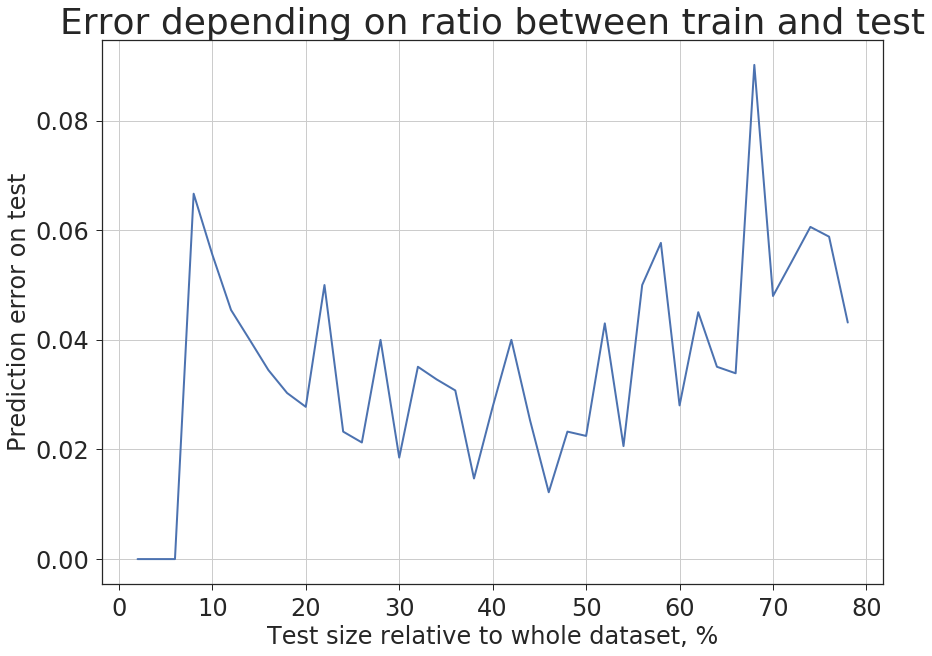

In [140]:
plt.figure(figsize=(14,10))
plt.grid(True)

plt.plot(ratio, err)
plt.title('Error depending on ratio between train and test')
plt.xlabel('Test size relative to whole dataset, %', size=24)
plt.ylabel('Prediction error on test', size=24)
plt.savefig(fname='ratio.png',format='png')
plt.show()